### Importing all the necessary libraries

In [90]:
import matplotlib.pyplot as plt
import numpy as np
import pickle
import pandas as pd

### Extracting data by reading the pickle file (data is the set of train_images)

In [91]:
with open('train_label.pkl', 'rb') as f:
    data = pickle.load(f)

### This tells us that there are total 4 types of class labels that are - 0,2,3,6

In [93]:
set(data)

{0, 2, 3, 6}

In [94]:
len(data)

8000

In [95]:
with open('train_image.pkl', 'rb') as f:
    images = pickle.load(f)

In [96]:
len(images)

8000

In [97]:
images=np.array(images)

### This tells us that there are 8000 images

In [98]:
images.shape

(8000, 784)

In [99]:
first_image=images[0].reshape(28,28)

In [100]:
first_image.shape

(28, 28)

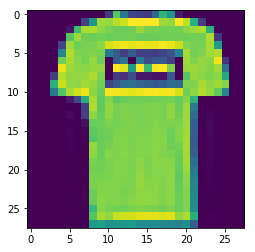

In [101]:
plt.imshow(first_image)

### Using keras to apply neural network model

In [102]:
from keras.models import Sequential
from keras.layers import Dense

In [103]:
model = Sequential()
model.add(Dense(256, input_dim=784, activation='relu',bias_initializer='zeros',kernel_initializer='random_uniform'))
#model.add(Activation('relu'))
model.add(Dense(256, activation='relu',kernel_initializer='random_uniform')) 
model.add(Dense(4,kernel_initializer='random_uniform'))

In [104]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [105]:
images=np.array(images)
data=np.array(data)

In [106]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(images,data)

In [107]:
# x_train=images
# y_train=data

### Encoding image labels array

In [111]:
from sklearn.preprocessing import OneHotEncoder

In [112]:
y_train=y_train.reshape(-1,1)

In [113]:
y_test=y_test.reshape(-1,1)

In [114]:
encoder = OneHotEncoder(sparse=False)
y_train_one = encoder.fit_transform(y_train)

In [115]:
y_test_one = encoder.transform(y_test)

In [116]:
y_train_one[0]

array([1., 0., 0., 0.])

In [85]:
model.fit(x_train, y_train_one, batch_size = 100, epochs = 20)

Epoch 1/20
8000/8000 [==============================] - 1s 75us/step - loss: 8.0590 - acc: 0.2500
Epoch 2/20
8000/8000 [==============================] - 1s 72us/step - loss: 8.0590 - acc: 0.2500
Epoch 3/20
8000/8000 [==============================] - 1s 71us/step - loss: 8.0590 - acc: 0.2500
Epoch 4/20
8000/8000 [==============================] - 1s 72us/step - loss: 8.0590 - acc: 0.2500
Epoch 5/20
8000/8000 [==============================] - 1s 74us/step - loss: 8.0590 - acc: 0.2500
Epoch 6/20
8000/8000 [==============================] - 1s 81us/step - loss: 8.0590 - acc: 0.2500
Epoch 7/20
8000/8000 [==============================] - 1s 75us/step - loss: 8.0590 - acc: 0.2500
Epoch 8/20
8000/8000 [==============================] - 1s 73us/step - loss: 8.0590 - acc: 0.2500
Epoch 9/20
8000/8000 [==============================] - 1s 76us/step - loss: 8.0590 - acc: 0.2500
Epoch 10/20
8000/8000 [==============================] - 1s 78us/step - loss: 8.0590 - acc: 0.2500
Epoch 11/20
8000/80

### Extracting the test images

In [131]:
with open('test_image.pkl', 'rb') as f:
    test = pickle.load(f)

In [132]:
test=np.array(test)

In [142]:
test.shape

(2000, 784)

In [143]:
ypred=model.predict(test)

### Extracting the final class of the image by taking the max of all the indivual classes

In [146]:
y=ypred.argmax(axis=1)

In [149]:
len(y)

2000

In [148]:
print(y)

[0 0 0 ... 0 3 0]


In [150]:
index=[x for x in range(0,2000)]

In [152]:
y_=np.c_[index,y]

### Storing data in csv file

In [155]:
np.savetxt('ratikpuri.csv',y_,delimiter=',', header="image_index,class",fmt="%s,%s", comments="")